# Sentiment Analysis of COVID-19 Tweets: When did the Public Panic Set In?

    Notebook by Allison Kelly - allisonkelly42@gmail.com
    

# Imports

In [1]:
%matplotlib inline

# Generic Imports
import pandas as pd
pd.set_option('display.max_colwidth', 150) # See more text
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, time

# Get JSON
import json
import ast

# Text preprocessing libraries
import string
import contractions
import re
import nltk
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords, wordnet
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk import FreqDist
from nltk.collocations import *
from nltk.collocations import BigramAssocMeasures

# Exploratory data analysis libraries
from wordcloud import WordCloud

# Obtain Data

View method to obtain data <a href="https://github.com/akelly66/COVID-Tweet-Sentiment/blob/master/tweet-scraping/COVID-tweets-true.ipynb">here</a>. <br>
<br>The tweet query parameters were as follows:

- <b>Keywords: </b> "coronavirus OR Wuhan virus OR 2019-nCoV OR China flu"<br>
- <b>Date Range: </b> 28 Jan 2020 - 03 Feb 2020<br>
- <b>Location:</b> United States of America<br><br>


In [4]:
df = pd.read_csv("expanded_query_tweets.csv")
df.drop_duplicates(inplace=True)
df = df.query("lang == 'en'")
df.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,extended_tweet,favorite_count,favorited,filter_level,...,quoted_status_id_str,quoted_status_permalink,reply_count,retweet_count,retweeted,retweeted_status,source,text,truncated,user
0,NaN,NaN,Sun Feb 02 23:59:59 +0000 2020,NaN,"{'hashtags': [], 'urls': [], 'user_mentions': [{'screen_name': 'QuestForSense', 'name': 'Atakan Derelioglu, PhD', 'id': 1495052767, 'id_str': '149...",NaN,NaN,0,False,low,...,NaN,NaN,0,0,False,"{'created_at': 'Sun Feb 02 20:44:31 +0000 2020', 'id': 1224071120212627456, 'id_str': '1224071120212627456', 'text': 'Amazing Timelapse as China C...","<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>","RT @QuestForSense: Amazing Timelapse as China Completes First of Two Hospitals in Wuhan within 10 days having 1,000 beds and 1,400 medical…",False,"{'id': 184207003, 'id_str': '184207003', 'name': '☮️Ope', 'screen_name': 'The_Ope_', 'location': 'Third rock from the sun', 'url': None, 'descript..."
1,NaN,NaN,Sun Feb 02 23:59:58 +0000 2020,NaN,"{'hashtags': [{'text': 'coronavirus', 'indices': [37, 49]}], 'urls': [], 'user_mentions': [{'screen_name': 'selinawangtv', 'name': 'Selina Wang', ...",NaN,NaN,0,False,low,...,NaN,NaN,0,0,False,"{'created_at': 'Sun Feb 02 23:44:46 +0000 2020', 'id': 1224116481950011393, 'id_str': '1224116481950011393', 'text': 'Bloomberg SCOOP on #coronavi...","<a href=""http://twitter.com/#!/download/ipad"" rel=""nofollow"">Twitter for iPad</a>","RT @selinawangtv: Bloomberg SCOOP on #coronavirus impact: Chinese oil demand said to have dropped by about three million barrels a day, or…",False,"{'id': 561036180, 'id_str': '561036180', 'name': 'JJK', 'screen_name': 'jjkenny1', 'location': None, 'url': None, 'description': None, 'translator..."
2,NaN,NaN,Sun Feb 02 23:59:58 +0000 2020,NaN,"{'hashtags': [], 'urls': [], 'user_mentions': [{'screen_name': 'Marfoogle', 'name': 'MARFOOGLE NEWS (OFFICIAL)', 'id': 961504257051521024, 'id_str...",NaN,NaN,0,False,low,...,NaN,NaN,0,0,False,"{'created_at': 'Sun Feb 02 22:31:43 +0000 2020', 'id': 1224098097468305408, 'id_str': '1224098097468305408', 'text': 'I have become Ill. But no wo...","<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>","RT @Marfoogle: I have become Ill. But no worries, Its just stuff related to my existing G.I. issues. So No coronavirus here. I saw emails c…",False,"{'id': 1211438984229818368, 'id_str': '1211438984229818368', 'name': 'Laura Turner', 'screen_name': 'LauraTu85646722', 'location': 'Utah, USA', 'u..."
3,NaN,NaN,Sun Feb 02 23:59:58 +0000 2020,NaN,"{'hashtags': [], 'urls': [{'url': 'https://t.co/4LkEEVSqqg', 'expanded_url': 'https://www.npr.org/2020/02/02/802087551/u-s-hospitals-unprepared-fo...",NaN,NaN,0,False,low,...,NaN,NaN,0,0,False,"{'created_at': 'Sun Feb 02 22:26:33 +0000 2020', 'id': 1224096797364088832, 'id_str': '1224096797364088832', 'text': 'U.S. Hospitals Unprepared Fo...","<a href=""http://twitter.com/#!/download/ipad"" rel=""nofollow"">Twitter for iPad</a>",RT @NPRHealth: U.S. Hospitals Unprepared For A Quickly Spreading Coronavirus https://t.co/4LkEEVSqqg,False,"{'id': 2227143195, 'id_str': '2227143195', 'name': 'Dr. Scott Newton 😷↔️😷', 'screen_name': 'DrScottNewton', 'location': 'USA & Global', 'url': 'ht..."
4,NaN,NaN,Sun Feb 02 23:59:58 +0000 2020,NaN,"{'hashtags': [], 'urls': [], 'user_mentions': [{'screen_name': 'PuffDragon11', 'name': 'Puff Dragon', 'id': 1057666719127240704, 'id_str': '105766...",NaN,NaN,0,False,low,...,NaN,NaN,0,0,False,"{'created_at': 'Sat Feb 01 03:05:07 +0000 2020', 'id': 1223442123761975296, 'id_str': '1223442123761975296', 'text': 'Just read the @zerohedge pie...","<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",RT @PuffDragon11: Just read the @zerohedge piece on the coronavirus. My PhD is in Mol. Bio. No doubt this is an engineered bioweapon and no…,False,"{'id': 1443971138, 'id_

In [5]:
print(len(df))
print(df.info())
df.describe()

2996
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2996 entries, 0 to 2999
Data columns (total 36 columns):
contributors                 0 non-null float64
coordinates                  0 non-null float64
created_at                   2996 non-null object
display_text_range           228 non-null object
entities                     2996 non-null object
extended_entities            244 non-null object
extended_tweet               234 non-null object
favorite_count               2996 non-null int64
favorited                    2996 non-null bool
filter_level                 2996 non-null object
geo                          0 non-null float64
id                           2996 non-null int64
id_str                       2996 non-null int64
in_reply_to_screen_name      141 non-null object
in_reply_to_status_id        133 non-null float64
in_reply_to_status_id_str    133 non-null float64
in_reply_to_user_id          146 non-null float64
in_reply_to_user_id_str      146 non-null float64
is_

,contributors,coordinates,favorite_count,geo,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,quote_count,quoted_status_id,quoted_status_id_str,reply_count,retweet_count
count,0.0,0.0,2996.000000,0.0,2.996000e+03,2.996000e+03,1.330000e+02,1.330000e+02,1.460000e+02,1.460000e+02,2996.000000,2.260000e+02,2.260000e+02,2996.000000,2996.000000
mean,NaN,NaN,1.985981,NaN,1.223419e+18,1.223419e+18,1.223356e+18,1.223356e+18,2.864927e+17,2.864927e+17,0.062083,1.222852e+18,1.222852e+18,0.164553,0.622497
std,NaN,NaN,40.995987,NaN,1.303859e+14,1.303859e+14,2.380334e+14,2.380334e+14,4.388216e+17,4.388216e+17,0.856762,2.313826e+15,2.313826e+15,1.686030,9.376703
min,NaN,NaN,0.000000,NaN,1.223394e+18,1.223394e+18,1.221944e+18,1.221944e+18,7.867640e+05,7.867640e+05,0.000000,1.190002e+18,1.190002e+18,0.000000,0.000000
25%,NaN,NaN,0.000000,NaN,1.223394e+18,1.223394e+18,1.223346e+18,1.223346e+18,6.412300e+07,6.412300e+07,0.000000,1.222953e+18,1.222953e+18,0.000000,0.000000
50%,NaN,NaN,0.000000,NaN,1.223395e+18,1.223395e+18,1.223389e+18,1.223389e+18,1.342405e+09,1.342405e+09,0.000000,1.223240e+18,1.223240e+18,0.000000,0.000000
75%,NaN,NaN,0.000000,NaN,1.223395e+18,1.223395e+18,1.223393e+18,1.223393e+18,7.661313e+17,7.661313e+17,0.000000,1.223373e+18,1.223373e+18,0.000000,0.000000
max,NaN,NaN,2013.000000,NaN,1.224120e+18,1.224120e+18,1.224119e+18,1.224119e+18,1.202716e+18,1.202716e+18,29.000000,1.224101e+18,1.224101e+18,48.000000,393.000000


Many of the tweets are truncated due to being retweets. The full, original tweet can be found in the retweeted_status column. The responses from the Twitter API are nested JSON objects, however when I converted them into a dataframe, the nested JSON objects became dictionary-like strings. The following cells will use abstract syntax trees to convert the string to a dictionary (though I'm really not sure why or how it works!) and pull the full text of the original tweet. I believe it's important to the sentiment analysis to interpret the original content as supported by the profile doing the retweeting.

In [6]:
def evaluate(row):
    '''
    This function, when applied to
    the series containing 
    dictionary-like strings will 
    convert each instance to
    actual dictionaries and return
    the dictionary.
    '''
    
    row = ast.literal_eval(row) 
    return row

# Saving dictionaries in new column
df['expanded'] = df.retweeted_status.dropna().apply(evaluate)

In [7]:
# Creating features from dictionary keys in new dataframe
expanded_df = df['expanded'].apply(pd.Series)

# Again, unnesting another dictionary to get to the full_text column
expanded_df = expanded_df.extended_tweet.apply(pd.Series)

# Dropping rows corresponding to original tweets (not retweeted text)
expanded_df = expanded_df.full_text.dropna()

In [8]:
# Joining with original dataframe
df = pd.DataFrame.join(df, expanded_df)

In [9]:
# Swapping NaNs for original tweets in the full text column
df['full_text'].fillna(df['text'],inplace=True)

# Preprocess Tweets

Though the entirety of the dataset is a treasure trove of information, I've singled out just the text portion to process for the sentiment analysis. 

In [10]:
tweet_df = df.loc[:,['full_text']]
tweet_df.head()

,full_text
0,"Amazing Timelapse as China Completes First of Two Hospitals in Wuhan within 10 days having 1,000 beds and 1,400 medical staff to treat those infec..."
1,"Bloomberg SCOOP on #coronavirus impact: Chinese oil demand said to have dropped by about three million barrels a day, or 20% of total consumption...."
2,"I have become Ill. But no worries, Its just stuff related to my existing G.I. issues. So No coronavirus here. I saw emails concerning my visit to ..."
3,RT @NPRHealth: U.S. Hospitals Unprepared For A Quickly Spreading Coronavirus https://t.co/4LkEEVSqqg
4,Just read the @zerohedge piece on the coronavirus. My PhD is in Mol. Bio. No doubt this is an engineered bioweapon and not natural. Statistically ...


In [11]:
def remove_url_and_RT(row):
    '''
    This function takes each tweet
    and removes the urls and retweet
    indicator from them.
    '''
    
    row = re.sub(r'http\S+|^RT', "", row)
    row = re.sub(r'\d*',"", row)
    return row

tweet_df.full_text = tweet_df.full_text.apply(remove_url_and_RT)

In [12]:
tweet_df.head()

,full_text
0,"Amazing Timelapse as China Completes First of Two Hospitals in Wuhan within days having , beds and , medical staff to treat those infected with t..."
1,"Bloomberg SCOOP on #coronavirus impact: Chinese oil demand said to have dropped by about three million barrels a day, or % of total consumption. C..."
2,"I have become Ill. But no worries, Its just stuff related to my existing G.I. issues. So No coronavirus here. I saw emails concerning my visit to ..."
3,@NPRHealth: U.S. Hospitals Unprepared For A Quickly Spreading Coronavirus
4,Just read the @zerohedge piece on the coronavirus. My PhD is in Mol. Bio. No doubt this is an engineered bioweapon and not natural. Statistically ...


In [13]:
def clean_tweet(tweet):
    
    '''
    This function takes a tweet variable,
    removes punctuation and linebreaks,
    sets all words to lowercase, and 
    returns the cleaned tweet as a single
    variable list.
    '''
    
    # Grabbing most common punctuation symbols and ellipsis symbol
    punctuation_list = list(string.punctuation)+ ["…"] + ['’']
    punctuation_list.remove('#')
    
    
    cleaned_tweet = []
    
    for symbol in punctuation_list:
        
        tweet = tweet.replace(symbol, "").lower()
        
        # Removing trailing characters
        tweet = tweet.rstrip()
        
        # Cleaning non-ASCII characters
        tweet = re.sub("([^\x00-\x7F])+","",tweet)
      
    cleaned_tweet.append(tweet)
    
    return cleaned_tweet

cleaned_tweet_test = clean_tweet(tweet_df.full_text[1])
cleaned_tweet_test        

['bloomberg scoop on #coronavirus impact chinese oil demand said to have dropped by about three million barrels a day or  of total consumption china is the worlds largest oil importer w outsized impact on the global energy mkt business quicktake']

In [14]:
def tokenize(clean_tweet):
    
    '''
    This function takes a cleaned tweet,
    joins into one string (if not already),
    runs the tweet through NLTK work tokenizer, 
    removes English stopwords, replaces "us"
    with "usa," removes numbers and returns
    the tokenized tweet in list format.
    '''
    
    joined_tweet = ' '.join(clean_tweet)
    stopwords_list = stopwords.words('english')
    
    tokenizer = TweetTokenizer()
    tokenized_tweet = tokenizer.tokenize(joined_tweet)
    # Removing stopwords
    tokenized_tweet = [word for word in tokenized_tweet if word not in stopwords_list]
    
    # Subbing 'usa' for 'us'
    tokenized_tweet = ['usa' if word == 'us' else word for word in tokenized_tweet]
    
    # Removing numbers
    tokenized_tweet = [word for word in tokenized_tweet if not word.isnumeric()]
    
    return tokenized_tweet

    

tokenized_tweet_test = tokenize(cleaned_tweet_test)
tokenized_tweet_test

['bloomberg',
 'scoop',
 '#coronavirus',
 'impact',
 'chinese',
 'oil',
 'demand',
 'said',
 'dropped',
 'three',
 'million',
 'barrels',
 'day',
 'total',
 'consumption',
 'china',
 'worlds',
 'largest',
 'oil',
 'importer',
 'w',
 'outsized',
 'impact',
 'global',
 'energy',
 'mkt',
 'business',
 'quicktake']

In [17]:
nltk.pos_tag(tokenized_tweet_test)

[('bloomberg', 'NN'),
 ('scoop', 'NN'),
 ('#coronavirus', 'NNP'),
 ('impact', 'NN'),
 ('chinese', 'JJ'),
 ('oil', 'NN'),
 ('demand', 'NN'),
 ('said', 'VBD'),
 ('dropped', 'VBD'),
 ('three', 'CD'),
 ('million', 'CD'),
 ('barrels', 'NNS'),
 ('day', 'NN'),
 ('total', 'JJ'),
 ('consumption', 'NN'),
 ('china', 'NN'),
 ('worlds', 'NNS'),
 ('largest', 'JJS'),
 ('oil', 'NN'),
 ('importer', 'NN'),
 ('w', 'NN'),
 ('outsized', 'VBN'),
 ('impact', 'NN'),
 ('global', 'JJ'),
 ('energy', 'NN'),
 ('mkt', 'NN'),
 ('business', 'NN'),
 ('quicktake', 'NN')]

In [18]:

from nltk import chunk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/Allie/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [19]:
def lem_tweet(tweet):
    '''
    This function takes a tweet in
    the form of a tokenized
    word list and lemmatizes it.
    '''
    lemmatizer = WordNetLemmatizer()
    
    lemmed_tweet = [lemmatizer.lemmatize(word) for word in tweet]
    
    return lemmed_tweet

lemmed_tweet_test = lem_tweet(tokenized_tweet_test)

In [20]:
lemmed_tweet_test

['bloomberg',
 'scoop',
 '#coronavirus',
 'impact',
 'chinese',
 'oil',
 'demand',
 'said',
 'dropped',
 'three',
 'million',
 'barrel',
 'day',
 'total',
 'consumption',
 'china',
 'world',
 'largest',
 'oil',
 'importer',
 'w',
 'outsized',
 'impact',
 'global',
 'energy',
 'mkt',
 'business',
 'quicktake']

In [21]:
def stem_tweet(tweet):
    
    stemmer = SnowballStemmer('english')
    stemmed_tweet = [stemmer.stem(word) for word in tweet]
    
    return stemmed_tweet

stem_test = stem_tweet(lemmed_tweet_test)
stem_test

['bloomberg',
 'scoop',
 '#coronavirus',
 'impact',
 'chines',
 'oil',
 'demand',
 'said',
 'drop',
 'three',
 'million',
 'barrel',
 'day',
 'total',
 'consumpt',
 'china',
 'world',
 'largest',
 'oil',
 'import',
 'w',
 'outsiz',
 'impact',
 'global',
 'energi',
 'mkt',
 'busi',
 'quicktak']

In [22]:
def process_tweet(tweet):
    '''
    This function takes an original 
    tweet, cleans, tokenizes, 
    and lemmatizes the tweet.
    '''
    
    cleaned = clean_tweet(tweet)
    tokenized = tokenize(cleaned)
#     stemmed_tweet = stem_tweet(tokenized)
    lemmed_tweet = lem_tweet(tokenized)
    
    return lemmed_tweet

tweet_df['processed_tweets'] = tweet_df['full_text'].apply(process_tweet)

In [23]:
# Resetting index
tweet_df = tweet_df.reset_index().drop('index',axis=1)

In [24]:
tweet_df.head()

,full_text,processed_tweets
0,"Amazing Timelapse as China Completes First of Two Hospitals in Wuhan within days having , beds and , medical staff to treat those infected with t...","[amazing, timelapse, china, completes, first, two, hospital, wuhan, within, day, bed, medical, staff, treat, infected, #coronavirus, #coronaviruso..."
1,"Bloomberg SCOOP on #coronavirus impact: Chinese oil demand said to have dropped by about three million barrels a day, or % of total consumption. C...","[bloomberg, scoop, #coronavirus, impact, chinese, oil, demand, said, dropped, three, million, barrel, day, total, consumption, china, world, large..."
2,"I have become Ill. But no worries, Its just stuff related to my existing G.I. issues. So No coronavirus here. I saw emails concerning my visit to ...","[become, ill, worry, stuff, related, existing, gi, issue, coronavirus, saw, email, concerning, visit, provedence, hospitalhome, first, usa, case, ..."
3,@NPRHealth: U.S. Hospitals Unprepared For A Quickly Spreading Coronavirus,"[nprhealth, usa, hospital, unprepared, quickly, spreading, coronavirus]"
4,Just read the @zerohedge piece on the coronavirus. My PhD is in Mol. Bio. No doubt this is an engineered bioweapon and not natural. Statistically ...,"[read, zerohedge, piece, coronavirus, phd, mol, bio, doubt, engineered, bioweapon, natural, statistically, improbably, segment, map, completely, d..."


In [ ]:
pd.read_csv('')

# Exploratory Data Analysis



In [25]:
# Combining words from all tweets into one list
all_words_list = [item for sublist in tweet_df.processed_tweets for item in sublist]

# Combining all words into one string
all_words_string = (" ").join(all_words_list)


A preliminary look at the most popular words in all of the tweets can be achieved through a word cloud. 

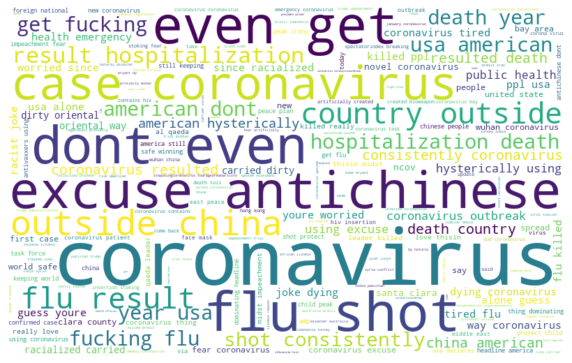

In [26]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, background_color='white').generate(all_words_string)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

At first glance, my impression of the tweets is quite negative. "Antichinese," "hospitalization," and "death" are words that stick out to me the most. 

## Frequency Distributions

NLTK's frequency distribution takes tokens of an entire corpus and shows the number of times each word is used. For this project, I will use all tokens from all tweets as the corpus in which to calculate the frequency distribution.

In [27]:
freqdist = FreqDist(all_words_list)

In [28]:
# Top 20 words in corpus
freqdist.most_common(20)

[('coronavirus', 2207),
 ('#coronavirus', 641),
 ('china', 614),
 ('usa', 537),
 ('flu', 497),
 ('death', 401),
 ('american', 393),
 ('case', 376),
 ('wuhan', 298),
 ('get', 295),
 ('dont', 261),
 ('health', 246),
 ('people', 245),
 ('killed', 241),
 ('country', 240),
 ('virus', 226),
 ('chinese', 221),
 ('even', 215),
 ('outbreak', 214),
 ('excuse', 202)]

In [29]:
len(freqdist)

5879

The total vocabulary of the tweets is 5,879 individual words. 

Below, we'll identify the top 50 words and calculate the percentage of the corpus each word holds.

In [30]:
# Total word count
tweet_word_count = sum(freqdist.values())
top_50_words = freqdist.most_common(50)

print('Word\t\t\tPercentage of Corpus\n')
for word in top_50_words:
    norm_freq = word[1]/tweet_word_count
    print('{} \t\t\t {:.4}'.format(word[0], round(norm_freq*100,2)))

Word			Percentage of Corpus

coronavirus 			 4.96
#coronavirus 			 1.44
china 			 1.38
usa 			 1.21
flu 			 1.12
death 			 0.9
american 			 0.88
case 			 0.85
wuhan 			 0.67
get 			 0.66
dont 			 0.59
health 			 0.55
people 			 0.55
killed 			 0.54
country 			 0.54
virus 			 0.51
chinese 			 0.5
even 			 0.48
outbreak 			 0.48
excuse 			 0.45
using 			 0.45
shot 			 0.45
first 			 0.42
antichinese 			 0.42
year 			 0.4
way 			 0.39
emergency 			 0.38
confirmed 			 0.34
new 			 0.33
public 			 0.33
outside 			 0.33
fucking 			 0.33
result 			 0.32
racist 			 0.31
since 			 0.31
hospitalization 			 0.31
consistently 			 0.31
resulted 			 0.31
hysterically 			 0.31
doctor 			 0.3
fear 			 0.29
impeachment 			 0.28
patient 			 0.28
spread 			 0.28
amp 			 0.26
trump 			 0.25
joke 			 0.25
world 			 0.25
day 			 0.25
youre 			 0.24


## Bigrams

Calculating bigrams will give us the most common word associations in the entire corpus. 

In [31]:
# Instantiate biram measures method
bigram_measures = BigramAssocMeasures()

# Find and then score associations by frequency
tweet_finder = BigramCollocationFinder.from_words(all_words_list)
tweet_scored = tweet_finder.score_ngrams(bigram_measures.raw_freq)

# Fifty most common bigrams
tweet_scored[:50]

[(('flu', 'shot'), 0.0043611186044420465),
 (('dont', 'even'), 0.004136318676378024),
 (('even', 'get'), 0.004136318676378024),
 (('excuse', 'antichinese'), 0.004136318676378024),
 (('outside', 'china'), 0.003214638971315529),
 (('country', 'outside'), 0.0030797590144771153),
 (('american', 'dont'), 0.003057279021670713),
 (('american', 'hysterically'), 0.003057279021670713),
 (('china', 'american'), 0.003057279021670713),
 (('consistently', 'coronavirus'), 0.003057279021670713),
 (('coronavirus', 'resulted'), 0.003057279021670713),
 (('death', 'country'), 0.003057279021670713),
 (('death', 'year'), 0.003057279021670713),
 (('flu', 'result'), 0.003057279021670713),
 (('fucking', 'flu'), 0.003057279021670713),
 (('get', 'fucking'), 0.003057279021670713),
 (('hospitalization', 'death'), 0.003057279021670713),
 (('hysterically', 'using'), 0.003057279021670713),
 (('result', 'hospitalization'), 0.003057279021670713),
 (('resulted', 'death'), 0.003057279021670713),
 (('shot', 'consistently'

## Mutual Information Scores

Pointwise mutual information scores quantify the likelihood that two or n- words will co-occur, taking into account the frequency of each word individuallay. This is accomplished by finding the log pobability that both words will occur and dividing by the singular probability that each word will occur: 
<b>PMI(a,b) = log(P(a,b)/P(a)P(b))</b>

In [32]:
tweet_finder.apply_freq_filter(10)

pointwise_mi_score = bigram_measures.pmi
pmi_scored = tweet_finder.score_ngrams(pointwise_mi_score)
print('Pointwise Mutual Information Bigrams\n')
pmi_scored[:20]

Pointwise Mutual Information Bigrams



[(('manufactured', 'chinaccp'), 12.119070805652951),
 (('speaker', 'patrol'), 12.119070805652951),
 (('chinaccp', 'censorship'), 11.981567281903017),
 (('emg', 'buckeyeblue'), 11.981567281903011),
 (('handed', 'transfer'), 11.981567281903011),
 (('transfer', 'request'), 11.981567281903011),
 (('drericding', 'graph'), 11.856036399819157),
 (('equipped', 'speaker'), 11.856036399819157),
 (('seanwhelanrte', 'handed'), 11.856036399819153),
 (('killing', 'cat'), 11.84406375815308),
 (('throwing', 'window'), 11.84406375815308),
 (('baekhyun', 'praised'), 11.74055918239922),
 (('praised', 'adorable'), 11.74055918239922),
 (('san', 'francisco'), 11.74055918239922),
 (('exos', 'baekhyun'), 11.740559182399217),
 (('roryfitz', 'seanwhelanrte'), 11.730505517735295),
 (('owner', 'killing'), 11.718532876069222),
 (('dems', 'wasted'), 11.63364397848271),
 (('opioid', 'overdose'), 11.63364397848271),
 (('summit', 'opioid'), 11.63364397848271)]

In [33]:
mi_likelihood_score = bigram_measures.mi_like
likelihood_scored = tweet_finder.score_ngrams(mi_likelihood_score)
print("Mutual Information Likelihood Bigrams\n")
likelihood_scored[:20]

Mutual Information Likelihood Bigrams



[(('excuse', 'antichinese'), 164.91512680679833),
 (('result', 'hospitalization'), 131.17730496453902),
 (('dont', 'even'), 111.0131693843001),
 (('racialized', 'carried'), 99.0),
 (('even', 'get'), 98.21843121797399),
 (('carried', 'dirty'), 95.15533980582525),
 (('dirty', 'oriental'), 95.15533980582525),
 (('alone', 'guess'), 94.20378640776698),
 (('shot', 'consistently'), 93.41414141414141),
 (('hysterically', 'using'), 91.56435643564356),
 (('santa', 'clara'), 90.01086956521739),
 (('guess', 'youre'), 87.22572815533981),
 (('joke', 'dying'), 83.3661826617407),
 (('youre', 'worried'), 83.1875),
 (('flu', 'shot'), 74.196532731744),
 (('country', 'outside'), 72.88415532879819),
 (('since', 'racialized'), 72.06617647058823),
 (('worried', 'since'), 66.06066176470588),
 (('racist', 'joke'), 62.22258560984994),
 (('using', 'excuse'), 61.64728948142339)]

In [34]:
tweet_df.to_csv('processed_tweets.csv')

## Word Vectorization

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
tweet_df = pd.read_csv('processed_tweets.csv')

In [4]:
tweet_list = tweet_df.processed_tweets.apply(('').join)

In [5]:
tweet_list

0       ['amazing', 'timelapse', 'china', 'completes', 'first', 'two', 'hospital', 'wuhan', 'within', 'day', 'bed', 'medical', 'staff', 'treat', 'infected...
1       ['bloomberg', 'scoop', '#coronavirus', 'impact', 'chinese', 'oil', 'demand', 'said', 'dropped', 'three', 'million', 'barrel', 'day', 'total', 'con...
2       ['become', 'ill', 'worry', 'stuff', 'related', 'existing', 'gi', 'issue', 'coronavirus', 'saw', 'email', 'concerning', 'visit', 'provedence', 'hos...
3                                                                       ['nprhealth', 'usa', 'hospital', 'unprepared', 'quickly', 'spreading', 'coronavirus']
4       ['read', 'zerohedge', 'piece', 'coronavirus', 'phd', 'mol', 'bio', 'doubt', 'engineered', 'bioweapon', 'natural', 'statistically', 'improbably', '...
                                                                                ...                                                                          
2991    ['due', 'threat', 'novel', 'coronavirus', 's

In [6]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(tweet_list)
dense_matrix = tfidf_matrix.todense()
dense_list = dense_matrix.tolist()

In [7]:
tfidf_df = pd.DataFrame(dense_list, columns = vectorizer.get_feature_names(), index=tweet_list)

In [8]:
tfidf_df.head()

,aa,aaaaggghhhhh,aampe,aasma,abbvie,abc,abcchicago,abcnews,abcnewsbayarea,abdirashidm,...,zhengli,zhou,zimbabwe,zimbabwean,zls,zombie,zone,zoonotic,zorrillaalex,zxrnoh
processed_tweets,,,,,,,,,,,,,,,,,,,,,
"['amazing', 'timelapse', 'china', 'completes', 'first', 'two', 'hospital', 'wuhan', 'within', 'day', 'bed', 'medical', 'staff', 'treat', 'infected', '#coronavirus', '#coronavirusoutbreak']",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"['bloomberg', 'scoop', '#coronavirus', 'impact', 'chinese', 'oil', 'demand', 'said', 'dropped', 'three', 'million', 'barrel', 'day', 'total', 'consumption', 'china', 'world', 'largest', 'oil', 'importer', 'w', 'outsized', 'impact', 'global', 'energy', 'mkt', 'business', 'quicktake']",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"['become', 'ill', 'worry', 'stuff', 'related', 'existing', 'gi', 'issue', 'coronavirus', 'saw', 'email', 'concerning', 'visit', 'provedence', 'hospitalhome', 'first', 'usa', 'case', 'contact', 'anyone', 'kept', 'distance', 'hospital']",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"['nprhealth', 'usa', 'hospital', 'unprepared', 'quickly', 'spreading', 'coronavirus']",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"['read', 'zerohedge', 'piece', 'coronavirus', 'phd', 'mol', 'bio', 'doubt', 'engineered', 'bioweapon', 'natural', 'statistically', 'improbably', 'segment', 'map', 'completely', 'different', 'virus', 'hiv', 'conservation']",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
tfidf_df.shape

(2996, 5740)

From 2,996 tweets, there is a total of 5,704 unique words. This includes hashtags and tagged handles. 

In [10]:
train_df = pd.read_csv("processed_train.csv")

In [11]:
train_tweet_list = train_df.processed_tweets.apply(('').join)

In [12]:
train_tweet_list

0          ['switchfoot', 'httptwitpiccom', '2y1zl', 'awww', 'thats', 'bummer', 'shoulda', 'got', 'david', 'carr', 'third', 'day']
1                  ['upset', 'cant', 'update', 'facebook', 'texting', 'might', 'cry', 'result', 'school', 'today', 'also', 'blah']
2                                          ['kenichan', 'dived', 'many', 'time', 'ball', 'managed', 'save', 'rest', 'go', 'bound']
3                                                                               ['whole', 'body', 'feel', 'itchy', 'like', 'fire']
4                                                                      ['nationwideclass', 'behaving', 'im', 'mad', 'cant', 'see']
                                                                    ...                                                           
1599995                                                                              ['woke', 'school', 'best', 'feeling', 'ever']
1599996                                           ['thewdbcom', 'cool', 'hear', 'ol

In [ ]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(train_tweet_list)
dense_matrix = tfidf_matrix.todense()
dense_list = dense_matrix.tolist()

In [ ]:
tfidf_df = pd.DataFrame(dense_list, columns = vectorizer.get_feature_names(), index=tweet_list)

## Word Embeddings

In [41]:
from gensim.models import Word2Vec

In [42]:
model = Word2Vec(tweet_df.processed_tweets, size=100, window=5, min_count = 1, workers=4)

In [43]:
model.train(tweet_df.processed_tweets, total_examples=model.corpus_count, epochs=10)

(387977, 444840)

In [44]:
wv = model.wv

In [45]:
wv.most_similar('flu')

[('dont', 0.978461503982544),
 ('get', 0.9750105142593384),
 ('even', 0.9736448526382446),
 ('traditional', 0.9714310169219971),
 ('jawn', 0.9657644629478455),
 ('joewongcomedy', 0.9568285942077637),
 ('shot', 0.9548853635787964),
 ('mitigationsubstantial', 0.9540234804153442),
 ('fucking', 0.9515603184700012),
 ('sivemorten', 0.9472203850746155)]

In [46]:
wv.most_similar(negative='flu')

[('mounted', 0.7230130434036255),
 ('socalled', 0.5600651502609253),
 ('havent', 0.5597646236419678),
 ('sym', 0.5304533839225769),
 ('undercounted', 0.43074631690979004),
 ('smallpox', 0.4215890169143677),
 ('invite', 0.4094087481498718),
 ('soared', 0.3742016553878784),
 ('ryangrim', 0.36662888526916504),
 ('anyway', 0.3468133807182312)]

In [47]:
wv.most_similar('coronavirus')

[('tirade', 0.9288728833198547),
 ('panic', 0.8851490020751953),
 ('laughing', 0.8847227692604065),
 ('together', 0.8819877505302429),
 ('holding', 0.8795121908187866),
 ('fxkbjj', 0.8792099356651306),
 ('debate', 0.8747334480285645),
 ('cover', 0.8728280067443848),
 ('ally', 0.8660754561424255),
 ('clinesanity', 0.8640154004096985)]